In [1]:
import pandas as pd
import matplotlib.pyplot as plt

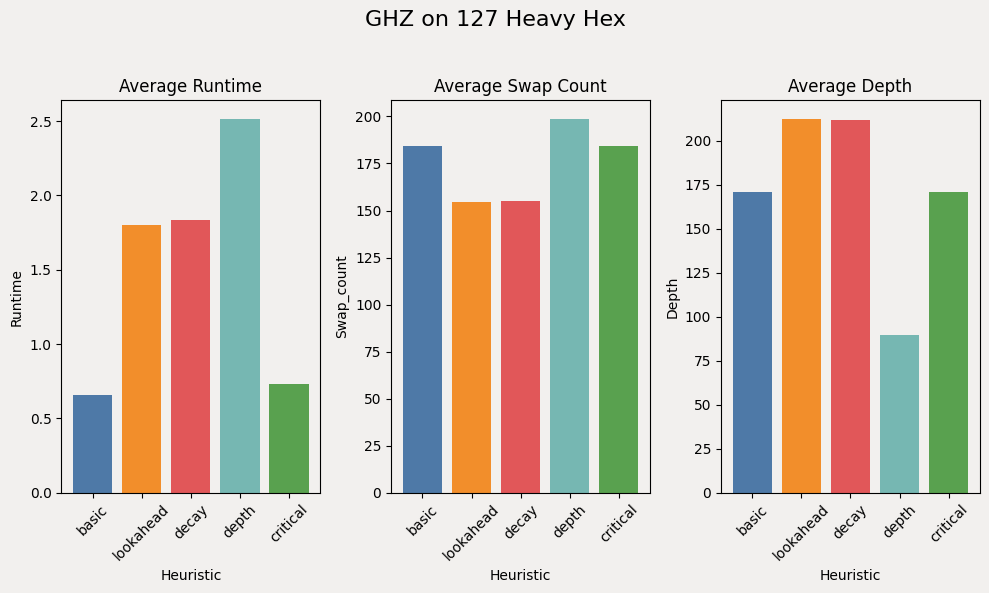

<Figure size 640x480 with 0 Axes>

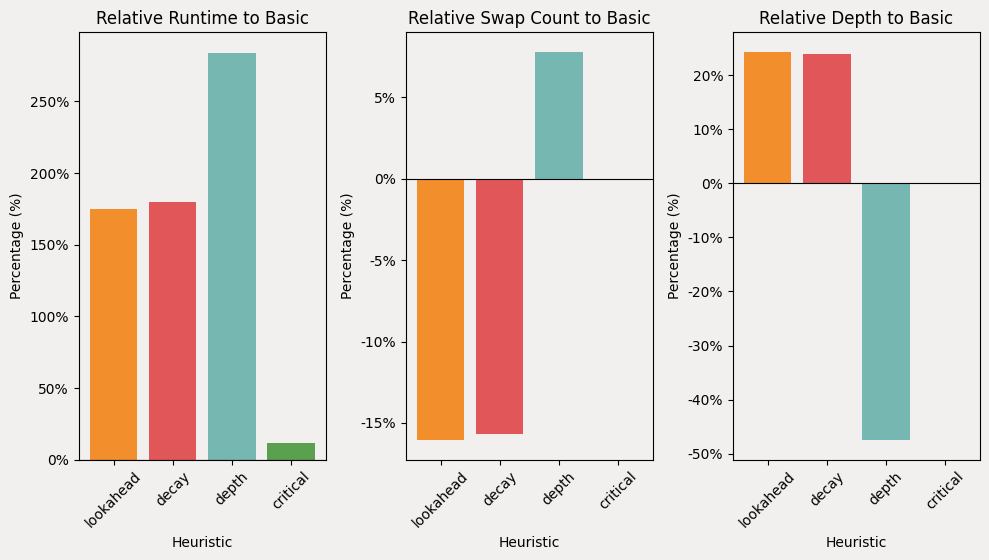

   heuristic  avg_runtime  avg_swap_count   avg_depth  rel_runtime_to_basic  \
0      basic     0.654728      184.231429  170.917429              0.000000   
1  lookahead     1.799498      154.626000  212.449429            174.846471   
2      decay     1.833419      155.320571  211.636000            180.027362   
3      depth     2.513597      198.615143   89.670857            283.914424   
4   critical     0.733545      184.231429  170.917429             12.038003   

   rel_swap_count_to_basic  rel_depth_to_basic  
0                 0.000000            0.000000  
1               -16.069695           24.299453  
2               -15.692685           23.823534  
3                 7.807416          -47.535569  
4                 0.000000            0.000000  


<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the CSV files
directory = "experiments/"
files = ["ghz_basic.csv", "ghz_lookahead.csv", "ghz_decay.csv", "ghz_depth.csv", "ghz_critical.csv"]

# Initialize a dictionary to store aggregated data
aggregated_data = {
    "heuristic": [],
    "avg_runtime": [],
    "avg_swap_count": [],
    "avg_depth": [],
    "rel_runtime_to_basic": [],
    "rel_swap_count_to_basic": [],
    "rel_depth_to_basic": []
}

basic_metrics = {}

# Process each file
for file in files:
    heuristic_name = file.split("/")[-1].replace("ghz_", "").replace(".csv", "")
    df = pd.read_csv(directory + file)
    
    # Compute the average for the entire data
    avg_runtime = df['avg_runtime'].mean()
    avg_swap_count = df['avg_swap_count'].mean()
    avg_depth = df['avg_depth'].mean()
    
    if heuristic_name == "basic":
        basic_metrics = {
            "avg_runtime": avg_runtime,
            "avg_swap_count": avg_swap_count,
            "avg_depth": avg_depth
        }
    
    aggregated_data["heuristic"].append(heuristic_name)
    aggregated_data["avg_runtime"].append(avg_runtime)
    aggregated_data["avg_swap_count"].append(avg_swap_count)
    aggregated_data["avg_depth"].append(avg_depth)
    
    if heuristic_name != "basic":
        aggregated_data["rel_runtime_to_basic"].append((avg_runtime - basic_metrics["avg_runtime"]) / basic_metrics["avg_runtime"] * 100)
        aggregated_data["rel_swap_count_to_basic"].append((avg_swap_count - basic_metrics["avg_swap_count"]) / basic_metrics["avg_swap_count"] * 100)
        aggregated_data["rel_depth_to_basic"].append((avg_depth - basic_metrics["avg_depth"]) / basic_metrics["avg_depth"] * 100)
    else:
        aggregated_data["rel_runtime_to_basic"].append(0)
        aggregated_data["rel_swap_count_to_basic"].append(0)
        aggregated_data["rel_depth_to_basic"].append(0)

# Convert the aggregated data to a DataFrame
agg_df = pd.DataFrame(aggregated_data)

# Define colors for the heuristics
colors = {
    "basic": "#4E79A7",
    "lookahead": "#F28E2B",
    "decay": "#E15759",
    "depth": "#76B7B2",
    "critical": "#59A14F"
}

# Define the background color
background_color = '#F2F0EE'

# Plotting the original bar graphs for each metric
metrics = ["avg_runtime", "avg_swap_count", "avg_depth"]
titles = ["Average Runtime", "Average Swap Count", "Average Depth"]

plt.figure(figsize=(10, 6))

# Set the background color for the entire figure
plt.gcf().set_facecolor(background_color)

# Add a title above all subplots
plt.suptitle("GHZ on 127 Heavy Hex", fontsize=16)

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = plt.subplot(1, 3, idx+1)
    ax.bar(agg_df['heuristic'], agg_df[metric], color=[colors[h] for h in agg_df['heuristic']])
    
    # Set the background color for the axes
    ax.set_facecolor(background_color)
    
    ax.set_title(title)
    ax.set_ylabel(metric.replace("avg_", "").capitalize())
    ax.set_xlabel("Heuristic")
    ax.set_xticks(agg_df['heuristic'])
    ax.set_xticklabels(agg_df['heuristic'], rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

# Save the figure
plt.savefig("average_metrics_comparison.png", facecolor=background_color)

# Plotting the relative comparison graph with a line at 0
plt.figure(figsize=(10, 6))

relative_metrics = ["rel_runtime_to_basic", "rel_swap_count_to_basic", "rel_depth_to_basic"]
relative_titles = ["Relative Runtime to Basic", "Relative Swap Count to Basic", "Relative Depth to Basic"]

# Filter out the "basic" heuristic for the relative comparison
rel_agg_df = agg_df[agg_df['heuristic'] != 'basic']
plt.gcf().set_facecolor(background_color)
for idx, (rel_metric, rel_title) in enumerate(zip(relative_metrics, relative_titles)):
    ax = plt.subplot(1, 3, idx+1)
    ax.bar(rel_agg_df['heuristic'], rel_agg_df[rel_metric], color=[colors[h] for h in rel_agg_df['heuristic']])
    
    # Add a horizontal line at y=0
    ax.axhline(0, color='black', linewidth=0.8)
    
    # Set the background color for the axes
    ax.set_facecolor(background_color)
    
    ax.set_title(rel_title)
    ax.set_ylabel("Percentage (%)")
    ax.set_xlabel("Heuristic")
    ax.set_xticks(rel_agg_df['heuristic'])
    ax.set_xticklabels(rel_agg_df['heuristic'], rotation=45)
    
    # Adjust y-axis to show percentage with % symbol
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

# Save the relative comparison figure
plt.savefig("relative_metrics_comparison.png", facecolor=background_color)

# Display the summary table
print(agg_df)


In [3]:
# Convert the aggregated data to a DataFrame
agg_df = pd.DataFrame(aggregated_data)

# Display the summary table
print("\nSummary Table:")
print(agg_df)



Summary Table:
   heuristic  avg_runtime  avg_swap_count   avg_depth  rel_runtime_to_basic  \
0      basic     0.654728      184.231429  170.917429              0.000000   
1  lookahead     1.799498      154.626000  212.449429            174.846471   
2      decay     1.833419      155.320571  211.636000            180.027362   
3      depth     2.513597      198.615143   89.670857            283.914424   
4   critical     0.733545      184.231429  170.917429             12.038003   

   rel_swap_count_to_basic  rel_depth_to_basic  
0                 0.000000            0.000000  
1               -16.069695           24.299453  
2               -15.692685           23.823534  
3                 7.807416          -47.535569  
4                 0.000000            0.000000  
